In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm

Generisemo skup podataka koji ce biti koriscen za ilustraciju.

In [4]:
x1 = np.random.uniform(-1, 1, 1000)
x2 = np.random.uniform(-1, 1, 1000)
x = np.vstack([x1, x2]).transpose()
x.shape

(1000, 2)

In [5]:
def f(x1_i, x2_i):
    return 2*(x1_i**2 + x2_i**2 <= 0.5) - 1

In [6]:
y = f(x1, x2)

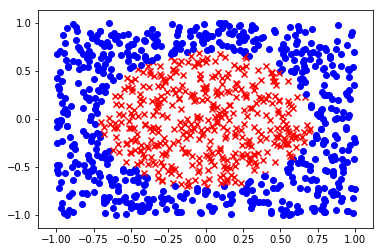

In [7]:
for (x1_i, x2_i) in zip(x1, x2):
    plt.scatter(x1_i, x2_i,
                c = ['blue' if f(x1_i, x2_i) == -1 else 'red'],
                marker='o' if f(x1_i, x2_i) == -1 else 'x')

Slika prikazuje da podaci koje smo generisali nisu linearno separabilni.
Ukoliko koristimo SVM klasifikator koji nije u stanju da pronadje nelinearne zakonitosti u podacima (`LinearSVC`) ocekujemo da ce dobijeni model ostvariti neku polovicnu preciznost.

Sa druge strane, ukoliko iskoristimo kernelizovani SVM klasifikator da podatke preslikamo u prostor u kojem postaju linearno separabilni, ocekujemo da takav klasifikator ostvari bolje rezultate.

<img src='kerneltrick.png'>

In [8]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.66, random_state = 7, stratify = y)

### SVM klasifikator bez kernela

In [9]:
linear_svm = svm.LinearSVC(loss='hinge', C=1.0)
linear_svm.fit(x_train, y_train)
linear_acc = metrics.accuracy_score(y_test, linear_svm.predict(x_test))
print("Linear SVM acc: %.2f" % linear_acc)

Linear SVM acc: 0.59


### Kernelizovani SVM klasifikator

In [10]:
kernelized_svm = svm.SVC(gamma=1, C=1.0)
kernelized_svm.fit(x_train, y_train)
kernelized_acc = metrics.accuracy_score(y_test, kernelized_svm.predict(x_test))
print("Kernelized SVM acc: %.2f" % kernelized_acc)

Kernelized SVM acc: 0.97


In [11]:
print('Number of support vectors for each class: {}'.format(kernelized_svm.n_support_))

Number of support vectors for each class: [54 54]


In [12]:
print('Number of support vectors: {}'.format(kernelized_svm.support_vectors_.shape[0]))
print('Number of samples in train: {}'.format(x_train.shape[0]))

Number of support vectors: 108
Number of samples in train: 340


Iscrtavamo ponovo podatke kao i pronadjene potporne vektore.

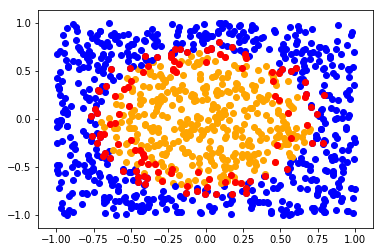

In [13]:
for (x1_i, x2_i) in zip(x1, x2):
    plt.scatter(x1_i, x2_i, c = ['blue' if f(x1_i, x2_i)==-1 else 'orange'] )
# vizuelizacija potpornih vektora
plt.scatter(kernelized_svm.support_vectors_[:, 0], kernelized_svm.support_vectors_[:, 1], c = ['red'])